In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [3]:
data = pd.read_csv("../res/spam-2.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop unavailable attributes
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [5]:
# rename columns 
data = data.rename(columns ={"v1":"target", "v2":"text"})
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# for counting ham and spam
data.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [7]:
data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham')

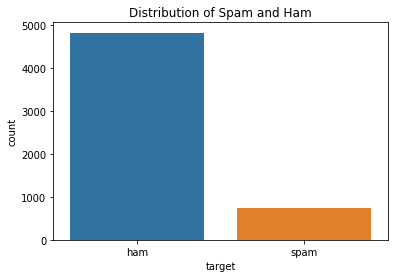

In [8]:
# plotting graph for spam/ham distribution
sns.countplot(x = "target", data = data)
data.loc[:, 'target'].value_counts()
plt.title('Distribution of Spam and Ham')

c:\Users\Alejandro\AppData\Local\Programs\Python\Python36-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alejandro\AppData\Local\Programs\Python\Python36-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


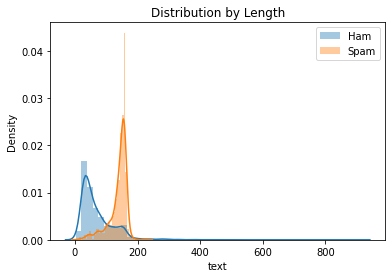

In [11]:
# plotting graph by length.
ham =data[data['target'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['target'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

In [13]:
# for counting frequently occurence of spam and ham.
count1 = Counter(" ".join(data[data['target']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['target']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

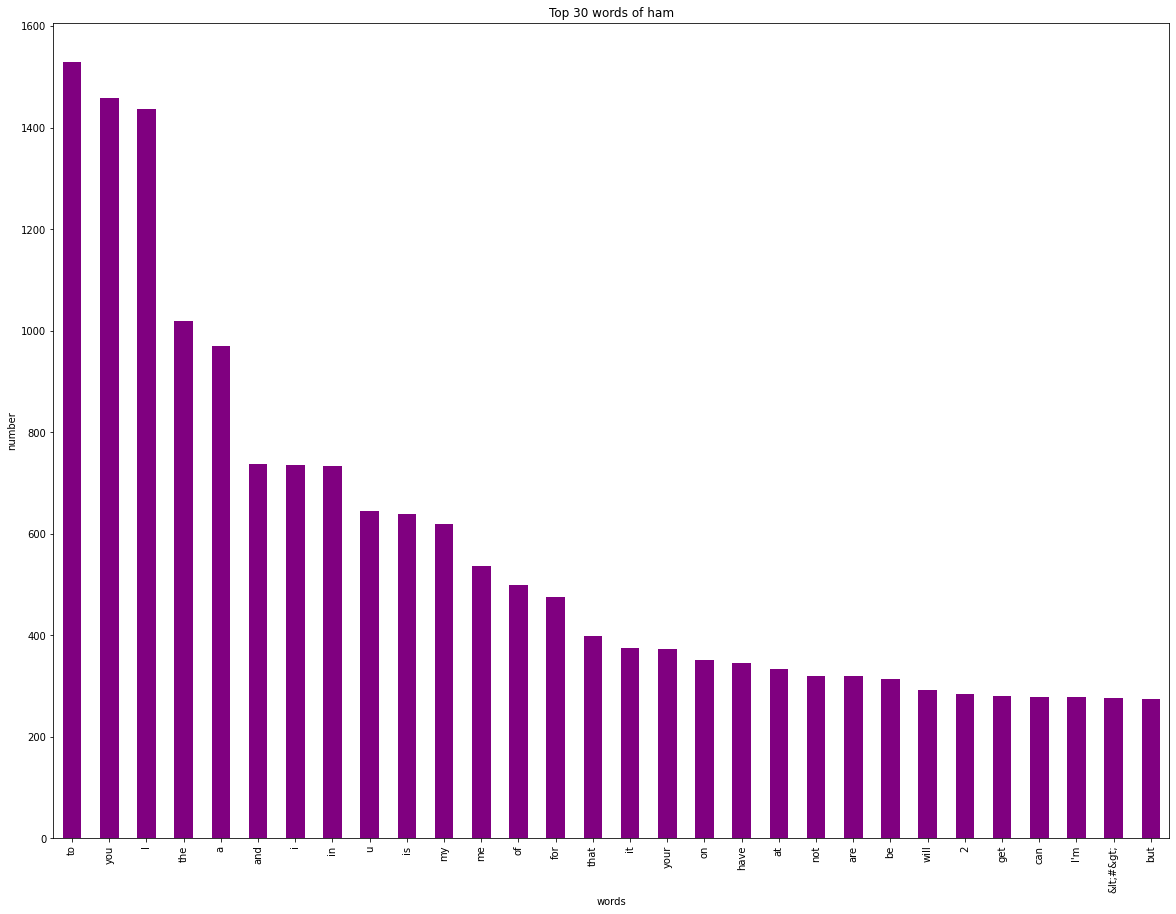

In [14]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

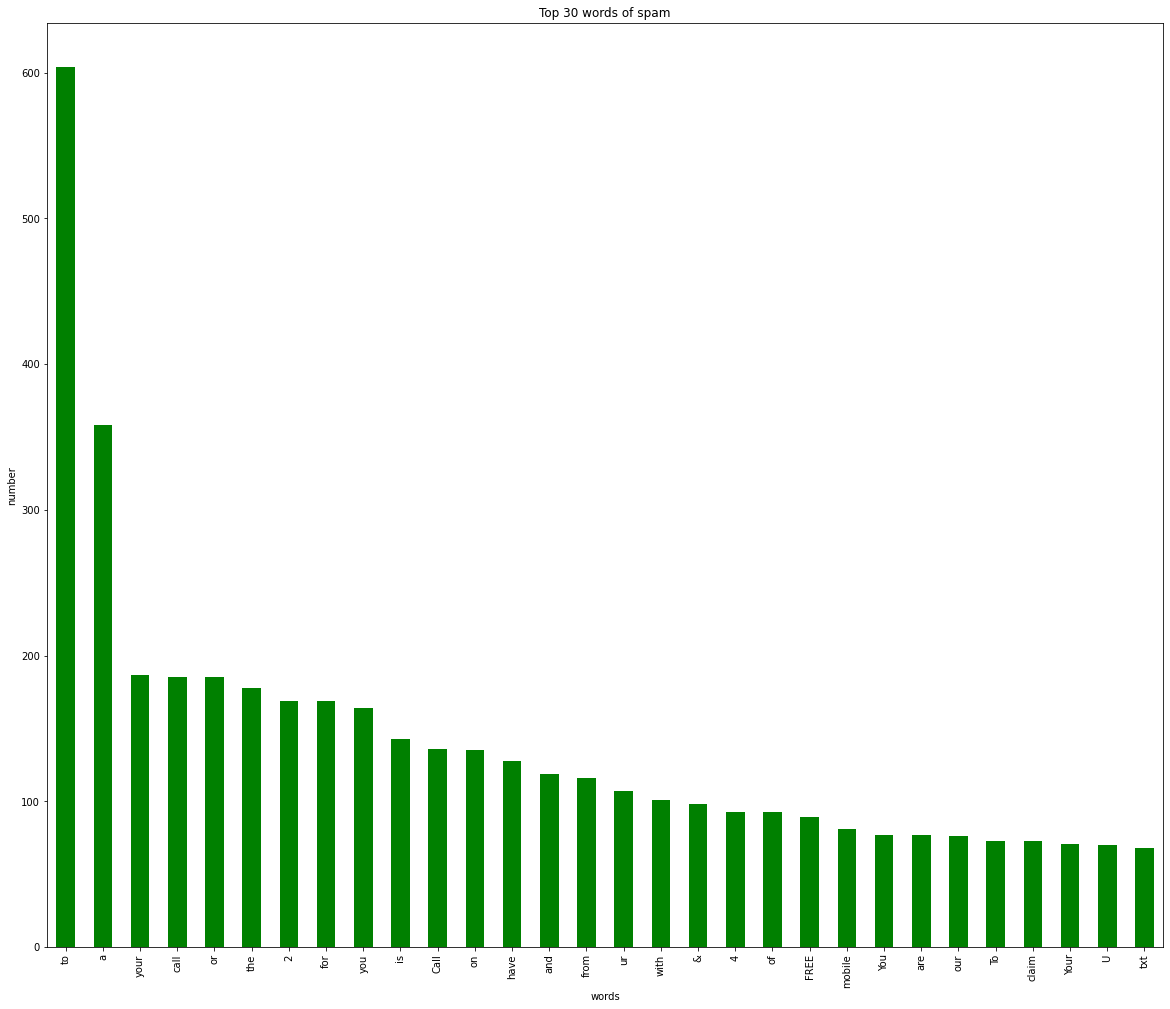

In [15]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size = 0.2, random_state = 101, stratify=data['target'])
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  4457
X_test:  1115
y_train:  4457
y_test:  1115


In [20]:
# Combine X_train and y_train into a single DataFrame
train_data = pd.DataFrame({'text': X_train, 'target': y_train})

In [21]:
# Combine X_test and y_test into a single DataFrame
test_data = pd.DataFrame({'text': X_test, 'target': y_test})

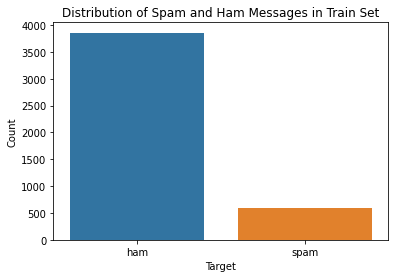

In [25]:
# Plot the distribution of spam and ham messages in the train set
# plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='target')
plt.title('Distribution of Spam and Ham Messages in Train Set')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

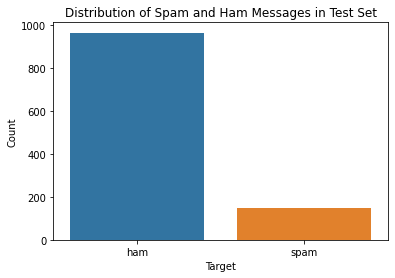

In [24]:
# Plot the distribution of spam and ham messages in the test set
# plt.figure(figsize=(10, 5))
sns.countplot(data=test_data, x='target')
plt.title('Distribution of Spam and Ham Messages in Test Set')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()